 <p style = "font-size: 40px;font-weight: bold;text-align:center;color:#0000FF"> Simple Linear Regression </p>


<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Ravi kumar
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 02/06/2022

**Assumptions of Linear Regression**

- There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s)

- The independent variables should not be correlated. Absence of this phenomenon is known as **multicollinearity**

- No auto correaltion

**Difference between Logistic regression and Linear regression**

- Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems. Linear regression provides a continuous output but Logistic regression provides discreet output

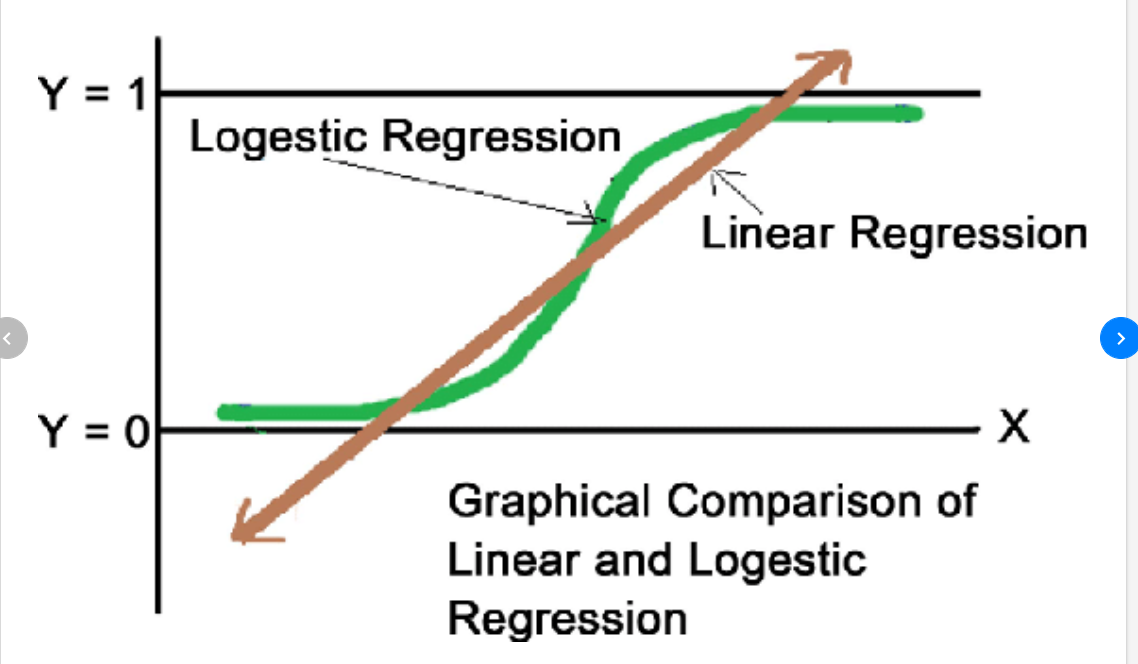

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading the dataset

In [6]:
#CSV file
df_sal = pd.read_csv("Salary_Data.csv")
display(df_sal.head())
df_sal.shape

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


(30, 2)

- Here we have one column as year of exp and another as salary
- We have to create a simple Linear regressor that fits the data in a straight line

**Simple Linear Regression**

**Y = b0 + b1*x**

- x is independent variable 
- Y is a dependent variable

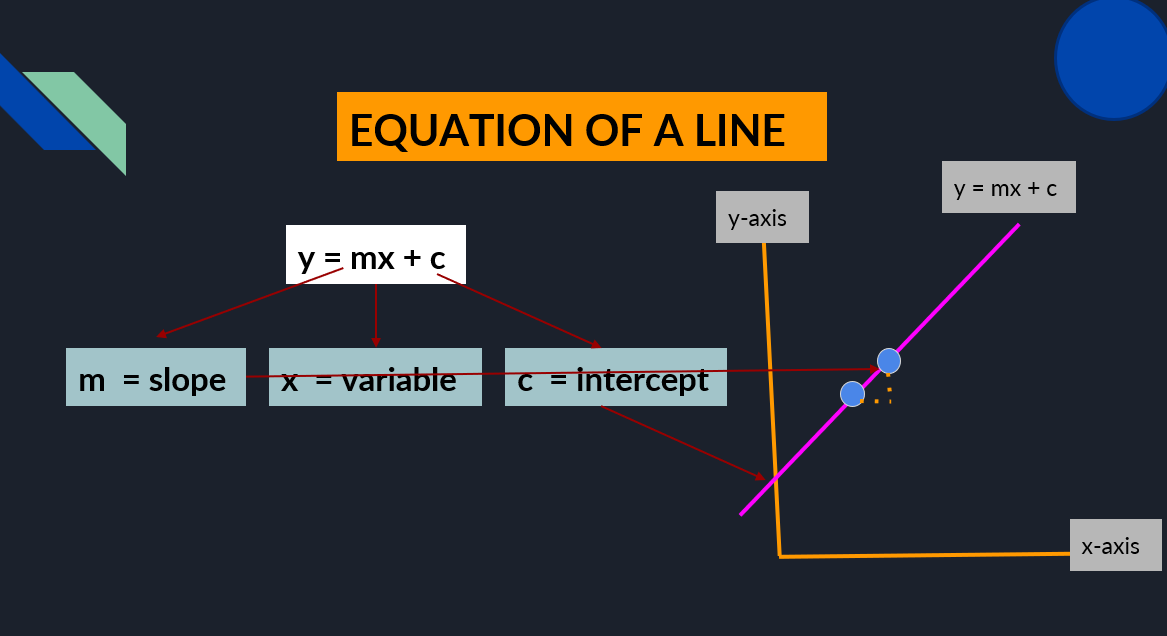

## Checking for NULL values

In [4]:
#checking for NULL
print(df_sal.isnull().sum()*100/df_sal.shape[0])

YearsExperience    0.0
Salary             0.0
dtype: float64


- Now we know that we don't have any NULL value in our dataset so that we can proceed further

## Splitting the Train and Test data

In [7]:
#Getting X and y variable
X = df_sal.drop('Salary',axis=1)
y =df_sal['Salary']

In [8]:
display(X.head())
print("Shape of X ",X.shape)
print("\n\n")
display(y.head().reset_index())
print("Shape of y", y.shape)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


Shape of X  (30, 1)





,index,Salary
0,0,39343.0
1,1,46205.0
2,2,37731.0
3,3,43525.0
4,4,39891.0


Shape of y (30,)


In [9]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4,random_state=0)

In [10]:
#Creating a model object and fiting the data
reg = LinearRegression()
reg.fit(X_train,y_train)

y_test_pred = reg.predict(X_test) #predicting the Test data
y_train_pred = reg.predict(X_train)

r2_score = reg.score(X_test,y_test)
print("Accuracy score -- ",r2_score*100,'%')

Accuracy score --  97.79208335417601 %


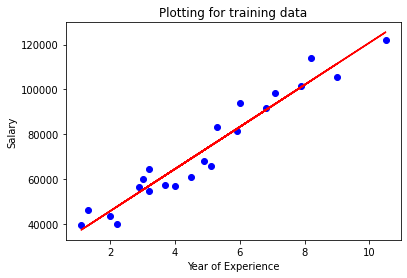

In [11]:
#plotting for training data
plt.scatter(X_train, y_train, color = 'b')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title("Plotting for training data")

# predicted values
plt.plot(X_train, reg.predict(X_train), color='r')
plt.show()

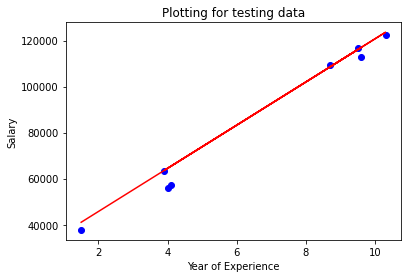

In [12]:
#plotting for test data
plt.scatter(X_test, y_test, color = 'b')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title("Plotting for testing data")

# predicted values
#plt.plot(X_train, reg.predict(X_train), color='r')
plt.plot(X_test, reg.predict(X_test), color='r')
plt.show()